# Which month of year is most profitable to release a movie?
To analyse this problem, imported the required libraries and downloaded data from zippedData folder 

In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#create a function to read the files
def read_files(path):
    df=pd.read_csv(path)
    return df

Loading data file tn.movie_budgets.csv.gz to a dataframe, this file consists data about movies date of release, production budget, domestic gross and worldwide gross. Through this data we find out the profit/loss of the movie.

In [6]:
#loading data to dataframe using read_files function
movie_budget_df =read_files('zippedData/tn.movie_budgets.csv.gz')

In [10]:
#print the first 5 rows in the dataframe
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [8]:
# Print the number of rows and columns in df
movie_budget_df.shape

(5782, 6)

In [9]:
# summary of the dataframe.
movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


Function to convert production_budget, domestic_gross and worldwide_gross to int type and also eliminate "$" symbol using string replace().

In [11]:
def convert_col_to_int(df, col):
    df[col]= df[col].str.replace("$","").str.replace("," , ""). astype('int64')
    return df

In [12]:
#calling the fuction to convert
cols_to_convert = ['production_budget','domestic_gross', 'worldwide_gross']
for col in cols_to_convert :
    movie_budget_df = convert_col_to_int(movie_budget_df, col)

In [13]:
#adding column month to dataframe
movie_budget_df['release_month']=pd.to_datetime(movie_budget_df
                         ['release_date']).dt.month

In [14]:
#checking the dataframe after the update
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,6
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,5
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12


In [15]:
movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
 6   release_month      5782 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 316.3+ KB


In [16]:
#checking for the nullvalues
movie_budget_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
release_month        0
dtype: int64

In [18]:
#finding out the profit/loss of the movie and adding column difference to dataframe
movie_budget_df['difference'] = movie_budget_df['worldwide_gross'] - movie_budget_df['production_budget']

In [19]:
movie_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_month,difference
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,12,2351345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,5,635063875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,6,-200237650
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,5,1072413963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,12,999721747


In [20]:
#Grouping the dataframe by release_month and finding the total profit in each month
profit_by_month_df = movie_budget_df.groupby(by=['release_month']).sum()

In [21]:
profit_by_month_df

,id,production_budget,domestic_gross,worldwide_gross,difference
release_month,,,,,
1,17371,7232691000,8310517342,16157646936,8924955936
2,19855,10994196247,13882543926,28045454121,17051257874
3,23461,14467577021,18129303397,37897684431,23430107410
4,23209,10806485000,12407092932,27203797390,16397312390
5,20576,19184024596,27146065077,66043077615,46859053019
6,23999,20644478311,31531570976,68268531657,47624053346
7,22046,18720308775,26720337439,62023990453,43303681678
8,26028,12675822719,15955429870,30245291880,17569469161
9,23905,10753760847,11412894262,23019987786,12266226939


In [22]:
#reseting the index
profit_by_month_df= profit_by_month_df.reset_index()

In [23]:
profit_by_month_df

,release_month,id,production_budget,domestic_gross,worldwide_gross,difference
0,1,17371,7232691000,8310517342,16157646936,8924955936
1,2,19855,10994196247,13882543926,28045454121,17051257874
2,3,23461,14467577021,18129303397,37897684431,23430107410
3,4,23209,10806485000,12407092932,27203797390,16397312390
4,5,20576,19184024596,27146065077,66043077615,46859053019
5,6,23999,20644478311,31531570976,68268531657,47624053346
6,7,22046,18720308775,26720337439,62023990453,43303681678
7,8,26028,12675822719,15955429870,30245291880,17569469161
8,9,23905,10753760847,11412894262,23019987786,12266226939
9,10,28645,11684993000,13994662807,28343193867,16658200867


Plotting the bar graph using seaborn to visualize the data which month is more profitable to releae the movie.

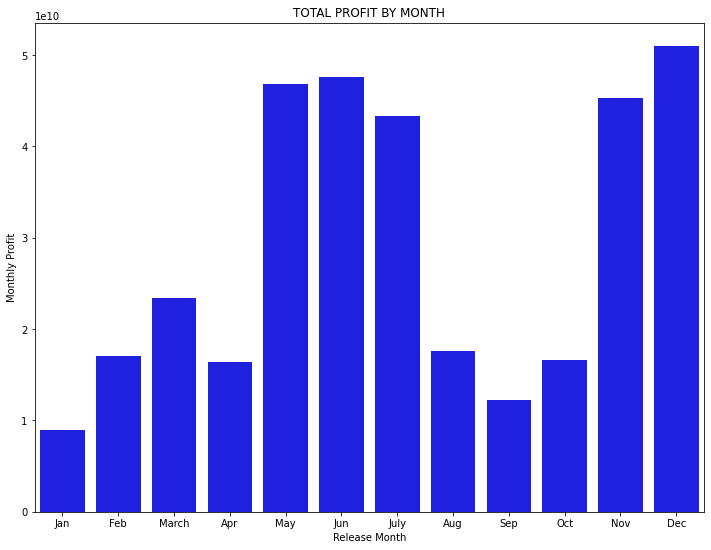

In [32]:
name = pd.DataFrame({'release_month': ['Jan', 'Feb', 'March','Apr','May',
                                       'Jun','July','Aug','Sep','Oct','Nov','Dec'],
                     'var': [1,2,3,4,5,6,7,8,9,10,11,12]})
plt.figure(figsize=(12,9))
fig = sns.barplot(x = 'release_month', y = profit_by_month_df['difference'], data=name, color='blue')
plt.xlabel("Release Month")
plt.ylabel("Monthly Profit")
plt.title("TOTAL PROFIT BY MONTH") 
plt.show(fig)

Conclusion: The top 3 profitable months to release the movie are December,June and May.